Import necessary packages.

In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

    In this project we used multiple CSV files and merged them to create a final dataset. We explored the data, conducted data cleaning, created visualizations for variables, and conducted machine learning models to derive business isnights. The project is divided in 7 parts:

    - Identifying the business problem
    - Sourcing the data
    - Exploring the data using Exploratory Data Analysis (EDA)
    - Preparing the data
    - Analyzing the data
    - Synthesizing results
    - Derive insights and recommendations
    
    Dataset source: https://ergast.com/mrd/db/

# Phase 1: Identifying the business problem

**The goal of this project is to understand how various factors impact the results and performance in Formula 1 races. Factors considered in this project include the driver characteristics, constructor, and circuit characteristics. Understanding these various factors and relationships can help us better stand how we can predict race points and constructor points.**

# Phase 2: Sourcing the data

In [85]:
# read in the data
df = pd.read_csv("F1 2016 - 2024 merges.csv")

In [86]:
# view the first 5 rows on the data
df.head()

,Unnamed: 0,raceId,year,circuitId,race_name,driverId,constructorId,race_points,race_fastestLapTime,race_fastestLapSpeed,...,qualifyId,q1,q2,q3,sprint_points,sprint_fastestLapTime,circuit_name,circuit_altitude,constructor_points,constructor_name
0,0,948,2016,1,Australian Grand Prix,3.0,131.0,25.0,1:30.557,210.815,...,6684.0,1:26.934,1:24.796,1:24.197,NaN,NaN,Albert Park Grand Prix Circuit,10,43.0,Mercedes
1,1,948,2016,1,Australian Grand Prix,1.0,131.0,18.0,1:30.646,210.608,...,6683.0,1:25.351,1:24.605,1:23.837,NaN,NaN,Albert Park Grand Prix Circuit,10,43.0,Mercedes
2,2,948,2016,1,Australian Grand Prix,20.0,6.0,15.0,1:29.951,212.235,...,6685.0,1:26.945,1:25.257,1:24.675,NaN,NaN,Albert Park Grand Prix Circuit,10,15.0,Ferrari
3,3,948,2016,1,Australian Grand Prix,817.0,9.0,12.0,1:28.997,214.510,...,6690.0,1:26.945,1:25.599,1:25.589,NaN,NaN,Albert Park Grand Prix Circuit,10,12.0,Red Bull
4,4,948,2016,1,Australian Grand Prix,13.0,3.0,10.0,1:32.288,206.861,...,6688.0,1:25.918,1:25.644,1:25.458,NaN,NaN,Albert Park Grand Prix Circuit,10,14.0,Williams


# Phase 3: Exploring the Data Using Exploratory Data Analysis

In [87]:
# view the data types and number of non-null values in the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3499 non-null   int64  
 1   raceId                 3499 non-null   int64  
 2   year                   3499 non-null   int64  
 3   circuitId              3499 non-null   int64  
 4   race_name              3499 non-null   object 
 5   driverId               3481 non-null   float64
 6   constructorId          3481 non-null   float64
 7   race_points            3481 non-null   float64
 8   race_fastestLapTime    3481 non-null   object 
 9   race_fastestLapSpeed   3481 non-null   object 
 10  drivers_forename       3481 non-null   object 
 11  drivers_surname        3481 non-null   object 
 12  dob                    3481 non-null   object 
 13  qualifyId              3471 non-null   float64
 14  q1                     3471 non-null   object 
 15  q2  

## Data Wrangling: Handling Missing Data 

In [88]:
# save the dataframe in a new object for the following steps to handle nulls in the case of any mistakes or accidentally dropped data
qualy_finished = df

In [89]:
# check for nulls
qualy_finished.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3499 non-null   int64  
 1   raceId                 3499 non-null   int64  
 2   year                   3499 non-null   int64  
 3   circuitId              3499 non-null   int64  
 4   race_name              3499 non-null   object 
 5   driverId               3481 non-null   float64
 6   constructorId          3481 non-null   float64
 7   race_points            3481 non-null   float64
 8   race_fastestLapTime    3481 non-null   object 
 9   race_fastestLapSpeed   3481 non-null   object 
 10  drivers_forename       3481 non-null   object 
 11  drivers_surname        3481 non-null   object 
 12  dob                    3481 non-null   object 
 13  qualifyId              3471 non-null   float64
 14  q1                     3471 non-null   object 
 15  q2  

In [90]:
# view proportion of missing data for each variable
for col in qualy_finished.columns:
    pct_missing = round(np.mean(qualy_finished[col].isnull()), 3)
    print('{} - {}'.format(col, pct_missing))

Unnamed: 0 - 0.0
raceId - 0.0
year - 0.0
circuitId - 0.0
race_name - 0.0
driverId - 0.005
constructorId - 0.005
race_points - 0.005
race_fastestLapTime - 0.005
race_fastestLapSpeed - 0.005
drivers_forename - 0.005
drivers_surname - 0.005
dob - 0.005
qualifyId - 0.008
q1 - 0.008
q2 - 0.011
q3 - 0.013
sprint_points - 0.92
sprint_fastestLapTime - 0.92
circuit_name - 0.0
circuit_altitude - 0.0
constructor_points - 0.005
constructor_name - 0.005


Although it does not appear at first that we have a significant amount of missing values for the variables q1, q2, and q3, further inspection shows that missing information for these variables has been coded as "\\N". An observation that shows "\\N" for one or multiple of these columns indicate that the driver did not finish the qualification round, which is quite common. In fact,q1 has 10% //N, q2 is 26%, and q3 is 50%. It would not be appropriate to impute these values with something, such as a 0 or the mean qualification time, because this would introduce significant bias. Additionally, values that are coded as "//N" provide valuable information, whether or not the driver finished the round, so it is important that we maintain this data. Therefore, we will convert q1, q2, and q3 to binary variables to indicate whether or not the driver finished the round. 0 indicates the round was not finished, 1 indicates the round was finished.  

In [91]:
# create 3 new binary variables 
qualy_finished['q1_complete'] = np.where(qualy_finished['q1']=='\\N',0,1)
qualy_finished['q2_complete'] = np.where(qualy_finished['q2']=='\\N',0,1)
qualy_finished['q3_complete'] = np.where(qualy_finished['q3']=='\\N',0,1)

In [92]:
# drop the original qualy time variables 
qualy_finished = qualy_finished.drop('q1',axis=1)
qualy_finished = qualy_finished.drop('q2',axis=1)
qualy_finished = qualy_finished.drop('q3',axis=1)

In [93]:
# make sure changes were made correctly
qualy_finished.head()

,Unnamed: 0,raceId,year,circuitId,race_name,driverId,constructorId,race_points,race_fastestLapTime,race_fastestLapSpeed,...,qualifyId,sprint_points,sprint_fastestLapTime,circuit_name,circuit_altitude,constructor_points,constructor_name,q1_complete,q2_complete,q3_complete
0,0,948,2016,1,Australian Grand Prix,3.0,131.0,25.0,1:30.557,210.815,...,6684.0,NaN,NaN,Albert Park Grand Prix Circuit,10,43.0,Mercedes,1,1,1
1,1,948,2016,1,Australian Grand Prix,1.0,131.0,18.0,1:30.646,210.608,...,6683.0,NaN,NaN,Albert Park Grand Prix Circuit,10,43.0,Mercedes,1,1,1
2,2,948,2016,1,Australian Grand Prix,20.0,6.0,15.0,1:29.951,212.235,...,6685.0,NaN,NaN,Albert Park Grand Prix Circuit,10,15.0,Ferrari,1,1,1
3,3,948,2016,1,Australian Grand Prix,817.0,9.0,12.0,1:28.997,214.510,...,6690.0,NaN,NaN,Albert Park Grand Prix Circuit,10,12.0,Red Bull,1,1,1
4,4,948,2016,1,Australian Grand Prix,13.0,3.0,10.0,1:32.288,206.861,...,6688.0,NaN,NaN,Albert Park Grand Prix Circuit,10,14.0,Williams,1,1,1


In [94]:
# impute 0 for '\\N' for race fastest lap time and fastest lap speed 
# we can do this because these variables have the value '\N' in 0.5% of the observations,
# so imputing 0 won't greatly bias the data
qualy_finished.replace(to_replace='\\N',value=0,inplace=True)

In [95]:
# check that all "\\N's" were removed
qualy_finished[qualy_finished["race_fastestLapTime"] == '\\N']

,Unnamed: 0,raceId,year,circuitId,race_name,driverId,constructorId,race_points,race_fastestLapTime,race_fastestLapSpeed,...,qualifyId,sprint_points,sprint_fastestLapTime,circuit_name,circuit_altitude,constructor_points,constructor_name,q1_complete,q2_complete,q3_complete


In [96]:
qualy_finished[qualy_finished["race_fastestLapTime"] == '\\N']

,Unnamed: 0,raceId,year,circuitId,race_name,driverId,constructorId,race_points,race_fastestLapTime,race_fastestLapSpeed,...,qualifyId,sprint_points,sprint_fastestLapTime,circuit_name,circuit_altitude,constructor_points,constructor_name,q1_complete,q2_complete,q3_complete


In [97]:
# because sprint points and lap time are 92% missing, we will remove them as they don't 
# provide insightful information for our analysys
qualy_finished = qualy_finished.drop('sprint_points',axis=1)
qualy_finished = qualy_finished.drop('sprint_fastestLapTime',axis=1)

In [98]:
# check the status of nulls
qualy_finished.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3499 non-null   int64  
 1   raceId                3499 non-null   int64  
 2   year                  3499 non-null   int64  
 3   circuitId             3499 non-null   int64  
 4   race_name             3499 non-null   object 
 5   driverId              3481 non-null   float64
 6   constructorId         3481 non-null   float64
 7   race_points           3481 non-null   float64
 8   race_fastestLapTime   3481 non-null   object 
 9   race_fastestLapSpeed  3481 non-null   object 
 10  drivers_forename      3481 non-null   object 
 11  drivers_surname       3481 non-null   object 
 12  dob                   3481 non-null   object 
 13  qualifyId             3471 non-null   float64
 14  circuit_name          3499 non-null   object 
 15  circuit_altitude     

In [99]:
# now, we move on to race points, which has 0.5% missing data
print(qualy_finished['race_points'].describe())
qualy_finished['race_points'].skew()

count    3481.000000
mean        5.004453
std         7.188846
min         0.000000
25%         0.000000
50%         0.000000
75%         8.000000
max        26.000000
Name: race_points, dtype: float64


1.4112247943961296

In [100]:
# because race_points is skewed we will impute nulls with the median value of 0
qualy_finished = qualy_finished.fillna({'race_points':qualy_finished.race_points.median()})

In [101]:
# we follow a similar process for constructor points
print(qualy_finished['constructor_points'].describe())
qualy_finished['constructor_points'].skew()

count    3481.000000
mean       10.246768
std        12.918461
min         0.000000
25%         0.000000
50%         4.000000
75%        18.000000
max        58.000000
Name: constructor_points, dtype: float64


1.2604256550146704

In [102]:
# impute nulls with median
qualy_finished = qualy_finished.fillna({'constructor_points':qualy_finished.constructor_points.median()})

In [103]:
# check the status of nulls
qualy_finished.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3499 non-null   int64  
 1   raceId                3499 non-null   int64  
 2   year                  3499 non-null   int64  
 3   circuitId             3499 non-null   int64  
 4   race_name             3499 non-null   object 
 5   driverId              3481 non-null   float64
 6   constructorId         3481 non-null   float64
 7   race_points           3499 non-null   float64
 8   race_fastestLapTime   3481 non-null   object 
 9   race_fastestLapSpeed  3481 non-null   object 
 10  drivers_forename      3481 non-null   object 
 11  drivers_surname       3481 non-null   object 
 12  dob                   3481 non-null   object 
 13  qualifyId             3471 non-null   float64
 14  circuit_name          3499 non-null   object 
 15  circuit_altitude     

In [104]:
# check where the nulls are occurring
for column in qualy_finished:
    print(f'Nulls for {column}:')
    print(qualy_finished[column].isnull())
    print(f' ')

Nulls for Unnamed: 0:
0       False
1       False
2       False
3       False
4       False
        ...  
3494    False
3495    False
3496    False
3497    False
3498    False
Name: Unnamed: 0, Length: 3499, dtype: bool
 
Nulls for raceId:
0       False
1       False
2       False
3       False
4       False
        ...  
3494    False
3495    False
3496    False
3497    False
3498    False
Name: raceId, Length: 3499, dtype: bool
 
Nulls for year:
0       False
1       False
2       False
3       False
4       False
        ...  
3494    False
3495    False
3496    False
3497    False
3498    False
Name: year, Length: 3499, dtype: bool
 
Nulls for circuitId:
0       False
1       False
2       False
3       False
4       False
        ...  
3494    False
3495    False
3496    False
3497    False
3498    False
Name: circuitId, Length: 3499, dtype: bool
 
Nulls for race_name:
0       False
1       False
2       False
3       False
4       False
        ...  
3494    False
3495    False
3

In [105]:
# We will drop the last 18 rows because they have missing values for the majority of the variables 
# and only provide information on the race ID, driver name, circuit name, and year, which is not beneficial to our analysis.
# Remove rows by index
qualy_finished = qualy_finished.drop(index=range(3481, 3499))

# Display the updated DataFrame
print(qualy_finished)

      Unnamed: 0  raceId  year  circuitId              race_name  driverId  \
0              0     948  2016          1  Australian Grand Prix       3.0   
1              1     948  2016          1  Australian Grand Prix       1.0   
2              2     948  2016          1  Australian Grand Prix      20.0   
3              3     948  2016          1  Australian Grand Prix     817.0   
4              4     948  2016          1  Australian Grand Prix      13.0   
...          ...     ...   ...        ...                    ...       ...   
3476        3476    1126  2024         79       Miami Grand Prix     822.0   
3477        3477    1126  2024         79       Miami Grand Prix     840.0   
3478        3478    1126  2024         79       Miami Grand Prix     848.0   
3479        3479    1126  2024         79       Miami Grand Prix     825.0   
3480        3480    1126  2024         79       Miami Grand Prix     858.0   

      constructorId  race_points race_fastestLapTime race_faste

In [106]:
qualy_finished.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3481 non-null   int64  
 1   raceId                3481 non-null   int64  
 2   year                  3481 non-null   int64  
 3   circuitId             3481 non-null   int64  
 4   race_name             3481 non-null   object 
 5   driverId              3481 non-null   float64
 6   constructorId         3481 non-null   float64
 7   race_points           3481 non-null   float64
 8   race_fastestLapTime   3481 non-null   object 
 9   race_fastestLapSpeed  3481 non-null   object 
 10  drivers_forename      3481 non-null   object 
 11  drivers_surname       3481 non-null   object 
 12  dob                   3481 non-null   object 
 13  qualifyId             3471 non-null   float64
 14  circuit_name          3481 non-null   object 
 15  circuit_altitude     

In [107]:
# save the dataframe which has taken care of nulls into new object "df"
df = qualy_finished

## Data Wrangling: Confirming understanding of units of measurements and converting time variables to useful units of measurement.

In [108]:
df = df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   raceId                3481 non-null   int64  
 1   year                  3481 non-null   int64  
 2   circuitId             3481 non-null   int64  
 3   race_name             3481 non-null   object 
 4   driverId              3481 non-null   float64
 5   constructorId         3481 non-null   float64
 6   race_points           3481 non-null   float64
 7   race_fastestLapTime   3481 non-null   object 
 8   race_fastestLapSpeed  3481 non-null   object 
 9   drivers_forename      3481 non-null   object 
 10  drivers_surname       3481 non-null   object 
 11  dob                   3481 non-null   object 
 12  qualifyId             3471 non-null   float64
 13  circuit_name          3481 non-null   object 
 14  circuit_altitude      3481 non-null   int64  
 15  constructor_points   

In [109]:
# Convert fastest lap speed to a float
df["race_fastestLapSpeed"] = df.race_fastestLapSpeed.astype(float)

Convert variables "dob" to age because this is a more useful variable for our analysis.

In [110]:
# Ensure dob is in proper datetime format. 
df['dob'] = pd.to_datetime(df['dob'])

In [111]:
df['dob'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3481 entries, 0 to 3480
Series name: dob
Non-Null Count  Dtype         
--------------  -----         
3481 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 27.3 KB


In [112]:
# To covert dob to age.
def calculate_age(dob):
    today = datetime.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

In [113]:
# Insert age column into dataframe. 
df['age'] = df['dob'].apply(calculate_age)

In [114]:
# Verify age is correct. 
selected_columns = df[['drivers_surname', 'drivers_forename','age']]
print(selected_columns)

     drivers_surname drivers_forename  age
0            Rosberg             Nico   38
1           Hamilton            Lewis   39
2             Vettel        Sebastian   36
3          Ricciardo           Daniel   34
4              Massa           Felipe   43
...              ...              ...  ...
3476          Bottas         Valtteri   34
3477          Stroll            Lance   25
3478           Albon        Alexander   28
3479       Magnussen            Kevin   31
3480        Sargeant            Logan   23

[3481 rows x 3 columns]


In [115]:
# View columns to verify units of measurement used in each column. 
select_columns = df[['race_fastestLapSpeed','circuit_name', 'circuit_altitude']]
print(select_columns)

      race_fastestLapSpeed                    circuit_name  circuit_altitude
0                  210.815  Albert Park Grand Prix Circuit                10
1                  210.608  Albert Park Grand Prix Circuit                10
2                  212.235  Albert Park Grand Prix Circuit                10
3                  214.510  Albert Park Grand Prix Circuit                10
4                  206.861  Albert Park Grand Prix Circuit                10
...                    ...                             ...               ...
3476               211.548   Miami International Autodrome                 0
3477               212.726   Miami International Autodrome                 0
3478               214.456   Miami International Autodrome                 0
3479               212.295   Miami International Autodrome                 0
3480               208.483   Miami International Autodrome                 0

[3481 rows x 3 columns]


The units of measurement for race_fastestLapSpeed is miles per hour and for circuit_altitude is meters. 

In [116]:
# Joining driver first and last name and making a driver_name column
df['driver_name'] = df['drivers_forename'] + ' ' + df['drivers_surname'] 

In [117]:
df=df.drop(['drivers_forename','drivers_surname'],axis=1)

In [118]:
# Convert columns to seconds 
# Converting column to datetime format 

df['race_fastestLapTime'] = pd.to_datetime(df['race_fastestLapTime'])
df['race_fastestLapTime'].head()

C:\Users\katie\AppData\Local\Temp\ipykernel_17180\4033289527.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['race_fastestLapTime'] = pd.to_datetime(df['race_fastestLapTime'])


0   2024-06-19 01:30:33
1   2024-06-19 01:30:38
2   2024-06-19 01:29:57
3   2024-06-19 01:28:59
4   2024-06-19 01:32:17
Name: race_fastestLapTime, dtype: datetime64[ns]

In [119]:
# Getting first 5 rows of time (ignoring date) for reference

df['race_fastestLapTime'].dt.time.head()

0    01:30:33
1    01:30:38
2    01:29:57
3    01:28:59
4    01:32:17
Name: race_fastestLapTime, dtype: object

In [120]:
# Extracting minute

# In the code I write "H" which corresponds to hour, not minute. This is because Python picks up the first part of the time
# as the hour, as it usually is structured that way. However, in formula 1 time starts in minutes
# Keep in mind - the code starts with "hour" just for Python's reference, but we know it actually is minutes

df['race_fastestLapTime'].dt.strftime("%H")

0       01
1       01
2       01
3       01
4       01
        ..
3476    01
3477    01
3478    01
3479    01
3480    01
Name: race_fastestLapTime, Length: 3481, dtype: object

In [121]:
# Extracting Second (formatted as minutes for Python's reference)

df['race_fastestLapTime'].dt.strftime("%M")

0       30
1       30
2       29
3       28
4       32
        ..
3476    32
3477    31
3478    30
3479    31
3480    33
Name: race_fastestLapTime, Length: 3481, dtype: object

In [122]:
# Storing separate times in variables

df['lap_minutes'] = df['race_fastestLapTime'].dt.strftime("%H").astype(int)
df['lap_seconds'] = df['race_fastestLapTime'].dt.strftime("%M").astype(int)

# Creating new column for total race time in milliseconds
df['fastest_lap_seconds'] = (df['lap_minutes'] * 60) + df['lap_seconds']
df.head()

,raceId,year,circuitId,race_name,driverId,constructorId,race_points,race_fastestLapTime,race_fastestLapSpeed,dob,...,constructor_points,constructor_name,q1_complete,q2_complete,q3_complete,age,driver_name,lap_minutes,lap_seconds,fastest_lap_seconds
0,948,2016,1,Australian Grand Prix,3.0,131.0,25.0,2024-06-19 01:30:33,210.815,1985-06-27,...,43.0,Mercedes,1,1,1,38,Nico Rosberg,1,30,90
1,948,2016,1,Australian Grand Prix,1.0,131.0,18.0,2024-06-19 01:30:38,210.608,1985-01-07,...,43.0,Mercedes,1,1,1,39,Lewis Hamilton,1,30,90
2,948,2016,1,Australian Grand Prix,20.0,6.0,15.0,2024-06-19 01:29:57,212.235,1987-07-03,...,15.0,Ferrari,1,1,1,36,Sebastian Vettel,1,29,89
3,948,2016,1,Australian Grand Prix,817.0,9.0,12.0,2024-06-19 01:28:59,214.510,1989-07-01,...,12.0,Red Bull,1,1,1,34,Daniel Ricciardo,1,28,88
4,948,2016,1,Australian Grand Prix,13.0,3.0,10.0,2024-06-19 01:32:17,206.861,1981-04-25,...,14.0,Williams,1,1,1,43,Felipe Massa,1,32,92


In [123]:
df.to_csv('F1_df.csv',index=False)

## Data Audit

### Continuous Assessment

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   raceId                3481 non-null   int64         
 1   year                  3481 non-null   int64         
 2   circuitId             3481 non-null   int64         
 3   race_name             3481 non-null   object        
 4   driverId              3481 non-null   float64       
 5   constructorId         3481 non-null   float64       
 6   race_points           3481 non-null   float64       
 7   race_fastestLapTime   3481 non-null   datetime64[ns]
 8   race_fastestLapSpeed  3481 non-null   float64       
 9   dob                   3481 non-null   datetime64[ns]
 10  qualifyId             3471 non-null   float64       
 11  circuit_name          3481 non-null   object        
 12  circuit_altitude      3481 non-null   int64         
 13  constructor_points

#### Descriptive Statistics and Distributions

In [126]:
def describe_helper(series):
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

Distribution and Descriptive Statistics for year:


C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


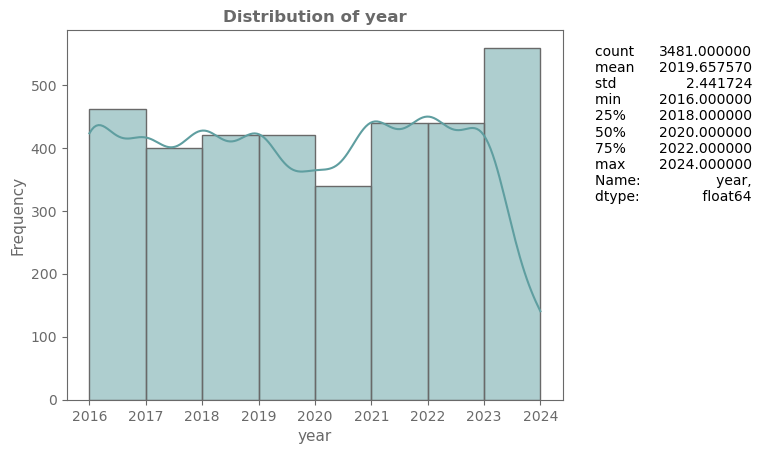

Distribution and Descriptive Statistics for age:


C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


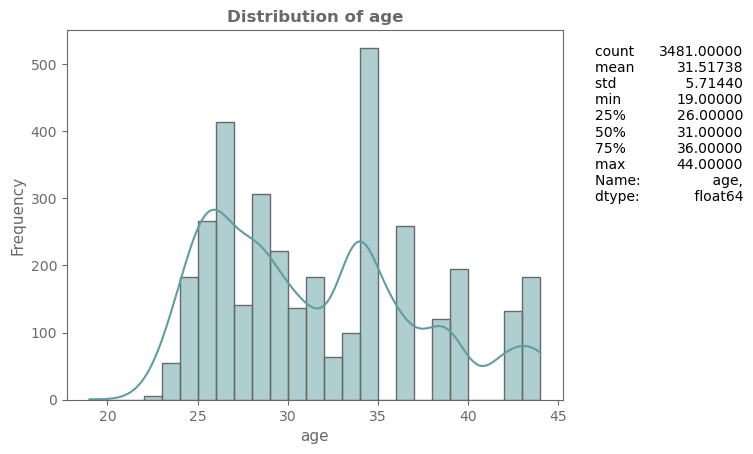

In [259]:
continuous_predictors_1 = ['year','age']

x = df[continuous_predictors_1]

for column in df[continuous_predictors_1]:
    print(f'Distribution and Descriptive Statistics for {column}:')
    hist = sns.histplot(data=df, x=column,binwidth=1,kde=True,color="cadetblue",edgecolor="dimgray")
    hist.set_xlabel( column , size = 11, color="dimgray" )
    hist.set_ylabel( "Frequency" , size = 11, color="dimgray" ) 
    hist.set_title(f'Distribution of {column}' , 
               fontsize = 'large',
                fontweight="bold",
               color="dimgray") 
    hist.spines['top'].set_color('dimgray')
    hist.spines['right'].set_color('dimgray')
    hist.spines['bottom'].set_color('dimgray')
    hist.spines['left'].set_color('dimgray')
    hist.tick_params(axis='x', colors='dimgray')
    hist.tick_params(axis='y', colors='dimgray')
    plt.figtext(.95, .49, describe_helper(pd.Series(df[column]))[0], {'multialignment':'left'})
    plt.figtext(1.05, .49, describe_helper(pd.Series(df[column]))[1], {'multialignment':'right'})
    plt.show()

C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


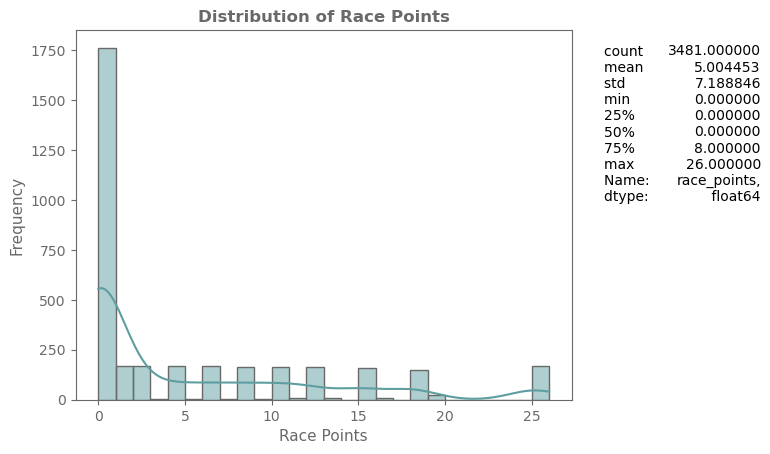

In [260]:
race_pt_hist = sns.histplot(data=df, x="race_points",binwidth=1,kde=True,color="cadetblue",edgecolor="dimgray")
race_pt_hist.set_xlabel( "Race Points" , size = 11, color="dimgray" ) 
race_pt_hist.set_ylabel( "Frequency" , size = 11, color="dimgray" ) 
race_pt_hist.set_title("Distribution of Race Points" , 
               fontweight="bold",
               fontsize = 'large',
               color="dimgray") 
race_pt_hist.spines['top'].set_color('dimgray')
race_pt_hist.spines['right'].set_color('dimgray')
race_pt_hist.spines['bottom'].set_color('dimgray')
race_pt_hist.spines['left'].set_color('dimgray')
race_pt_hist.tick_params(axis='x', colors='dimgray')
race_pt_hist.tick_params(axis='y', colors='dimgray')
plt.figtext(.95, .49, describe_helper(pd.Series(df.race_points))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(df.race_points))[1], {'multialignment':'right'})
plt.show()

C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


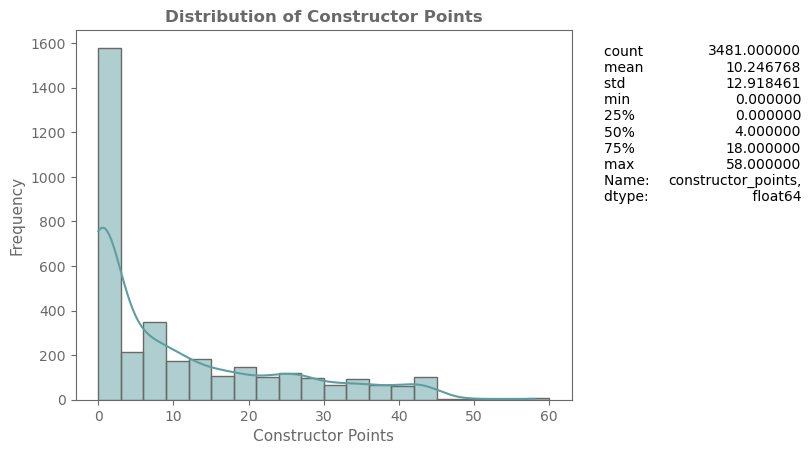

In [261]:
constructor_pt_hist = sns.histplot(data=df, x="constructor_points",binwidth=3,kde=True,color="cadetblue",edgecolor="dimgray")
constructor_pt_hist.set_xlabel( "Constructor Points" , size = 11, color="dimgray" ) 
constructor_pt_hist.set_ylabel( "Frequency" , size = 11, color="dimgray" ) 
constructor_pt_hist.set_title("Distribution of Constructor Points" , 
            fontweight="bold",   
            fontsize = 'large',
            color="dimgray") 
constructor_pt_hist.spines['top'].set_color('dimgray')
constructor_pt_hist.spines['right'].set_color('dimgray')
constructor_pt_hist.spines['bottom'].set_color('dimgray')
constructor_pt_hist.spines['left'].set_color('dimgray')
constructor_pt_hist.tick_params(axis='x', colors='dimgray')
constructor_pt_hist.tick_params(axis='y', colors='dimgray')
plt.figtext(.95, .49, describe_helper(pd.Series(df.constructor_points))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(df.constructor_points))[1], {'multialignment':'right'})
plt.show()

C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


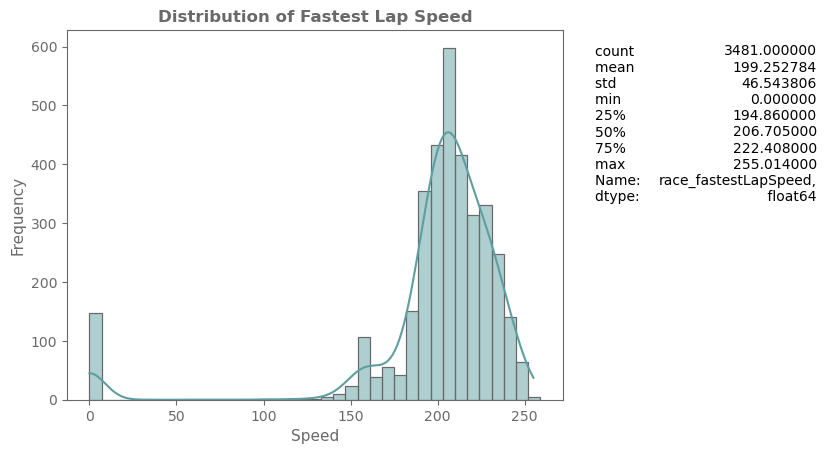

In [262]:
speed_hist = sns.histplot(data=df, x="race_fastestLapSpeed",binwidth=7,kde=True,color="cadetblue",edgecolor="dimgray")
speed_hist.set_xlabel( "Speed" , size = 11, color="dimgray" ) 
speed_hist.set_ylabel( "Frequency" , size = 11, color="dimgray" ) 
speed_hist.set_title("Distribution of Fastest Lap Speed" , 
            fontweight="bold",
            fontsize = 'large',
            color="dimgray") 
speed_hist.spines['top'].set_color('dimgray')
speed_hist.spines['right'].set_color('dimgray')
speed_hist.spines['bottom'].set_color('dimgray')
speed_hist.spines['left'].set_color('dimgray')
speed_hist.tick_params(axis='x', colors='dimgray')
speed_hist.tick_params(axis='y', colors='dimgray')
plt.figtext(.95, .49, describe_helper(pd.Series(df.race_fastestLapSpeed))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(df.race_fastestLapSpeed))[1], {'multialignment':'right'})
plt.show()

C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


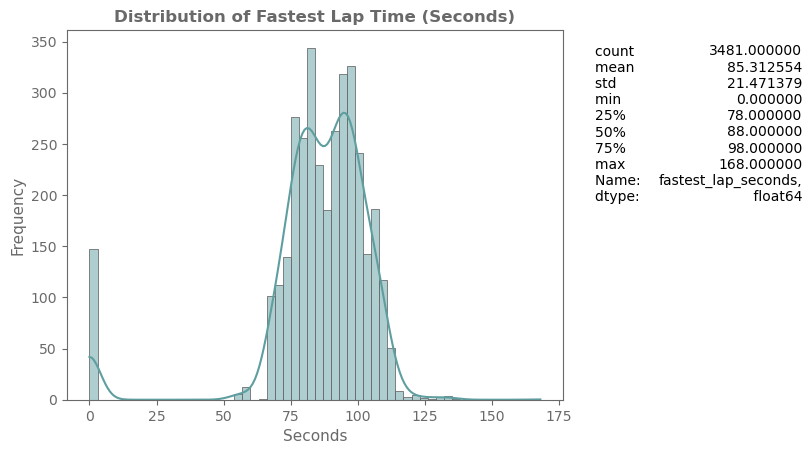

In [265]:
time_hist = sns.histplot(data=df, x="fastest_lap_seconds",binwidth=3,kde=True,color="cadetblue",edgecolor="dimgray")
time_hist.set_xlabel( "Seconds" , size = 11, color="dimgray" ) 
time_hist.set_ylabel( "Frequency" , size = 11, color="dimgray" ) 
time_hist.set_title("Distribution of Fastest Lap Time (Seconds)" , 
                fontweight="bold",
               fontsize = 'large',
               color="dimgray") 
time_hist.spines['top'].set_color('dimgray')
time_hist.spines['right'].set_color('dimgray')
time_hist.spines['bottom'].set_color('dimgray')
time_hist.spines['left'].set_color('dimgray')
time_hist.tick_params(axis='x', colors='dimgray')
time_hist.tick_params(axis='y', colors='dimgray')
plt.figtext(.95, .49, describe_helper(pd.Series(df.fastest_lap_seconds))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(df.fastest_lap_seconds))[1], {'multialignment':'right'})
plt.show()

C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


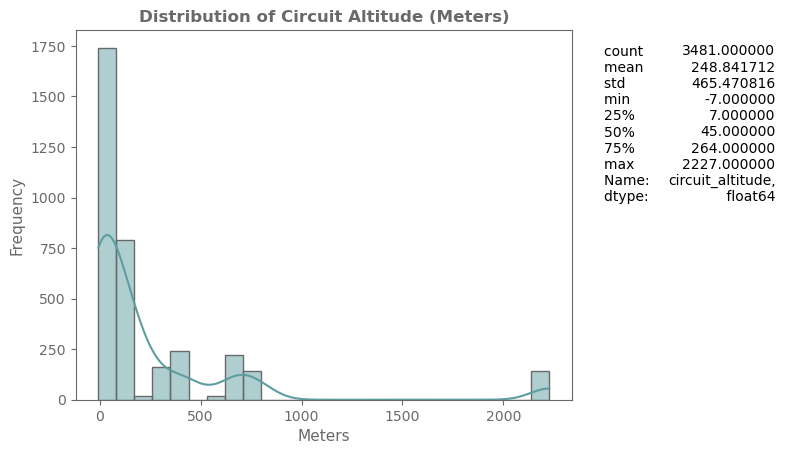

In [264]:
altitude_hist = sns.histplot(data=df, x="circuit_altitude",bins=25,kde=True,color="cadetblue",edgecolor="dimgray")
altitude_hist.set_xlabel( "Meters" , size = 11, color="dimgray" ) 
altitude_hist.set_ylabel( "Frequency" , size = 11, color="dimgray" ) 
altitude_hist.set_title("Distribution of Circuit Altitude (Meters)" , 
               fontweight="bold",
               fontsize = 'large',
               color="dimgray") 
altitude_hist.spines['top'].set_color('dimgray')
altitude_hist.spines['right'].set_color('dimgray')
altitude_hist.spines['bottom'].set_color('dimgray')
altitude_hist.spines['left'].set_color('dimgray')
altitude_hist.tick_params(axis='x', colors='dimgray')
altitude_hist.tick_params(axis='y', colors='dimgray')
plt.figtext(.95, .49, describe_helper(pd.Series(df.circuit_altitude))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(df.circuit_altitude))[1], {'multialignment':'right'})
plt.show()

### Visualize Relationships Between Numerical Variables and Race Points

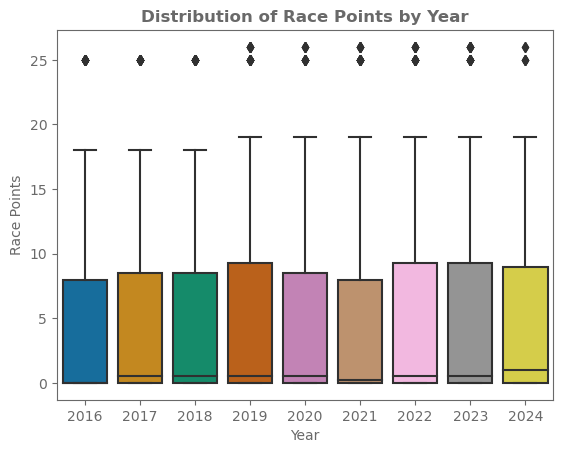

In [267]:
year_racepts = sns.boxplot(data=df,x="year", y="race_points", palette="colorblind")
plt.xlabel('Year', color='dimgray')
plt.ylabel('Race Points', color='dimgray')
plt.title(f'Distribution of Race Points by Year', color='dimgray',fontweight="bold")
year_racepts.spines['top'].set_color('dimgray')
year_racepts.spines['right'].set_color('dimgray')
year_racepts.spines['bottom'].set_color('dimgray')
year_racepts.spines['left'].set_color('dimgray')
year_racepts.tick_params(axis='x', colors='dimgray')
year_racepts.tick_params(axis='y', colors='dimgray')
plt.show()

We do not see much variation in the range of race points each year from 2016 to 2024. The minimum race points is, as expected, 0 for each year and the maximum is around 25. 2019, 2022, and 2023 have the highest median point values by a small margin. 

C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

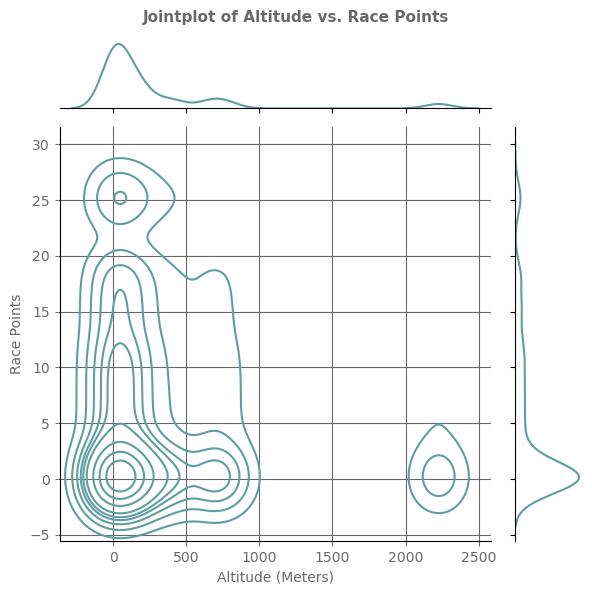

In [268]:
race_alt = sns.jointplot(x=df['circuit_altitude'], y=df['race_points'], kind='kde',color='cadetblue')
plt.suptitle('Jointplot of Altitude vs. Race Points', color='dimgray', fontsize=11,fontweight="bold")
plt.xlabel('Altitude (Meters)', color='dimgray')
plt.ylabel('Race Points', color='dimgray')
race_alt.ax_joint.grid(True, linestyle='-', color='dimgray')
race_alt.ax_joint.tick_params(axis='both', colors='dimgray')
plt.tight_layout(pad=1)
plt.show()

The above graph shows the relationship between race points and the altitude of the race track (circuit). We see that the majority of the data points cluster around a circuit altitude of around 50 and 0 race points. We also see that the circuit altitude for a race is typically less than 1000 meters, but there are a few races with a much higher altitude of 2,250 meters. This likely represents a specific location that has a high altitude. For the circuits of a "normal" altitude, below 1,000, the range of race points is large. However, for the high circuit altitude, around 2,250 meters, the race points are much lower, typically between 0 and 5. 

C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\katie\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

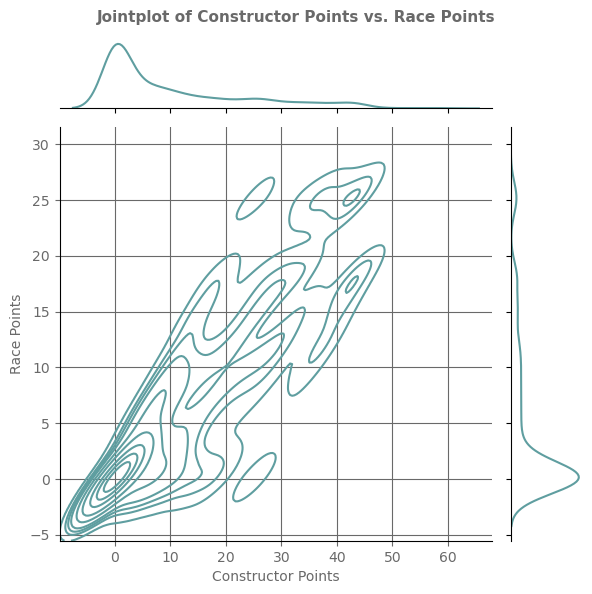

In [269]:
race_con = sns.jointplot(x=df['constructor_points'], y=df['race_points'], kind='kde',color='cadetblue')
plt.suptitle('Jointplot of Constructor Points vs. Race Points', color='dimgray', fontsize=11,fontweight="bold")
plt.xlabel('Constructor Points', color='dimgray')
plt.ylabel('Race Points', color='dimgray')
race_con.ax_joint.grid(True, linestyle='-', color='dimgray')
race_con.ax_joint.tick_params(axis='both', colors='dimgray')
plt.tight_layout(pad=1)
plt.show()

The visualization above shows the relationship between race points and constructor points, which is strongly positively correlated. This is to be expected because when a driver earns race points, they are also earning points for their team, or constructor. Therefore, higher race points indicate higher constructor points. Both of these variables are highly positively skewed, which expains the clustering of the majority of the data points in the lower lefthand section of the plot. The density plot also reveals some data point clusters that a typical scatter plot would not. For example, we see small clusters of data areand the values of 25 constructor points and very few race points, as well as aroud 25 constructor points and 25 race points.

### Correlation Matrix

In [139]:
corr = ['year','age','race_points','race_fastestLapSpeed','circuit_altitude','constructor_points','q1_complete','q2_complete','q3_complete']
x = df[corr]
x.corr()

,year,age,race_points,race_fastestLapSpeed,circuit_altitude,constructor_points,q1_complete,q2_complete,q3_complete
year,1.000000,-0.343050,0.014452,0.086199,-0.024912,0.039985,-0.009073,0.024005,0.029231
age,-0.343050,1.000000,0.114589,0.004422,0.008014,0.124164,0.021610,0.110896,0.100513
race_points,0.014452,0.114589,1.000000,0.168020,-0.000835,0.869614,0.033143,0.361754,0.547525
race_fastestLapSpeed,0.086199,0.004422,0.168020,1.000000,-0.033413,0.125685,0.002147,0.023713,0.050161
circuit_altitude,-0.024912,0.008014,-0.000835,-0.033413,1.000000,0.002019,0.014714,-0.007005,0.002174
constructor_points,0.039985,0.124164,0.869614,0.125685,0.002019,1.000000,0.026621,0.379802,0.564312
q1_complete,-0.009073,0.021610,0.033143,0.002147,0.014714,0.026621,1.000000,0.176323,0.102994
q2_complete,0.024005,0.110896,0.361754,0.023713,-0.007005,0.379802,0.176323,1.000000,0.584125
q3_complete,0.029231,0.100513,0.547525,0.050161,0.002174,0.564312,0.102994,0.584125,1.000000


<Axes: >

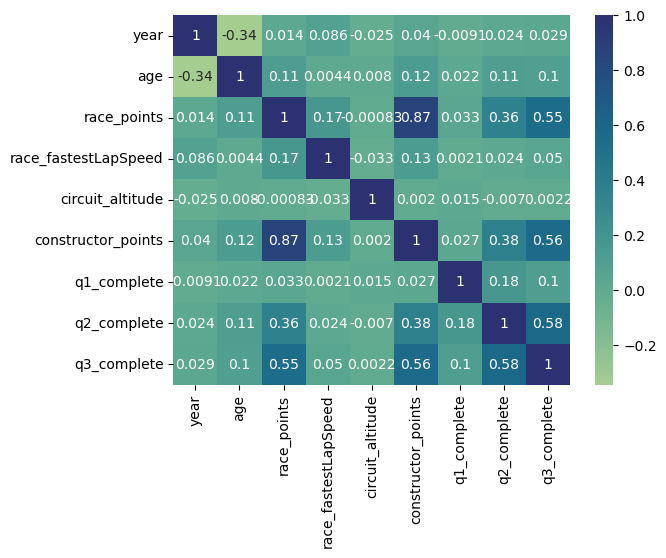

In [140]:
sns.heatmap(x.corr(), annot=True, cmap=sns.color_palette("crest", as_cmap=True))

There is no high multicolinearity. 

### Categorical Assessment

In [141]:
df['race_name'].value_counts()

race_name
Bahrain Grand Prix             182
British Grand Prix             162
Hungarian Grand Prix           162
Spanish Grand Prix             162
Italian Grand Prix             162
Belgian Grand Prix             162
Abu Dhabi Grand Prix           162
Austrian Grand Prix            162
Japanese Grand Prix            142
United States Grand Prix       142
Monaco Grand Prix              142
Australian Grand Prix          141
Canadian Grand Prix            122
Singapore Grand Prix           122
Russian Grand Prix             122
Azerbaijan Grand Prix          120
Chinese Grand Prix             102
Mexican Grand Prix              82
Brazilian Grand Prix            82
French Grand Prix               80
Saudi Arabian Grand Prix        80
German Grand Prix               62
Emilia Romagna Grand Prix       60
Miami Grand Prix                60
São Paulo Grand Prix            60
Mexico City Grand Prix          60
Dutch Grand Prix                60
Malaysian Grand Prix            42
Portuguese

In [142]:
df['race_name'].describe()

# Bahrain Grand Prix has the most number of observations, which is 182.Therefore, this is the mode.

count                   3481
unique                    38
top       Bahrain Grand Prix
freq                     182
Name: race_name, dtype: object

In [143]:
df['race_name'].min() 

# we see that there are 5 races with the same minimum value but the formula only gives one of them.

'70th Anniversary Grand Prix'

In [144]:
df['circuit_name'].value_counts()

circuit_name
Bahrain International Circuit           202
Red Bull Ring                           202
Silverstone Circuit                     182
Yas Marina Circuit                      162
Circuit de Barcelona-Catalunya          162
Hungaroring                             162
Circuit de Spa-Francorchamps            162
Autodromo Nazionale di Monza            162
Suzuka Circuit                          142
Autódromo José Carlos Pace              142
Circuit de Monaco                       142
Autódromo Hermanos Rodríguez            142
Baku City Circuit                       142
Circuit of the Americas                 142
Albert Park Grand Prix Circuit          141
Circuit Gilles Villeneuve               122
Sochi Autodrom                          122
Marina Bay Street Circuit               122
Shanghai International Circuit          102
Jeddah Corniche Circuit                  80
Circuit Paul Ricard                      80
Hockenheimring                           62
Miami International

In [145]:
df['circuit_name'].describe()

count                              3481
unique                               32
top       Bahrain International Circuit
freq                                202
Name: circuit_name, dtype: object

The mode is Bahrain International Circuit as well as Red Bull Ring. 

The circuits least observed are Nürburgring, Autodromo Internazionale del Mugell, and Las Vegas Strip Street Circuit.

In [146]:
df['constructor_name'].value_counts()

constructor_name
Mercedes          344
Haas F1 Team      344
Ferrari           344
McLaren           344
Red Bull          344
Williams          343
Alfa Romeo        208
Renault           200
Toro Rosso        166
AlphaTauri        166
Aston Martin      144
Alpine F1 Team    144
Sauber            136
Force India       124
Racing Point       76
Manor Marussia     42
RB F1 Team         12
Name: count, dtype: int64

In [147]:
df['constructor_name'].describe()

count         3481
unique          17
top       Mercedes
freq           344
Name: constructor_name, dtype: object

The mode for constructor (the constructors with most number of observations) are Mercedes, Haas F1 Team, Ferrari, McLaren and Red Bull. The constructor with the least number of observations is RB F1 Team.

C:\Users\katie\AppData\Local\Temp\ipykernel_17180\3025182468.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticklabels(), color='dimgray')
C:\Users\katie\AppData\Local\Temp\ipykernel_17180\3025182468.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticklabels(), color='dimgray')
C:\Users\katie\AppData\Local\Temp\ipykernel_17180\3025182468.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(axs[2].get_yticklabels(), color='dimgray')


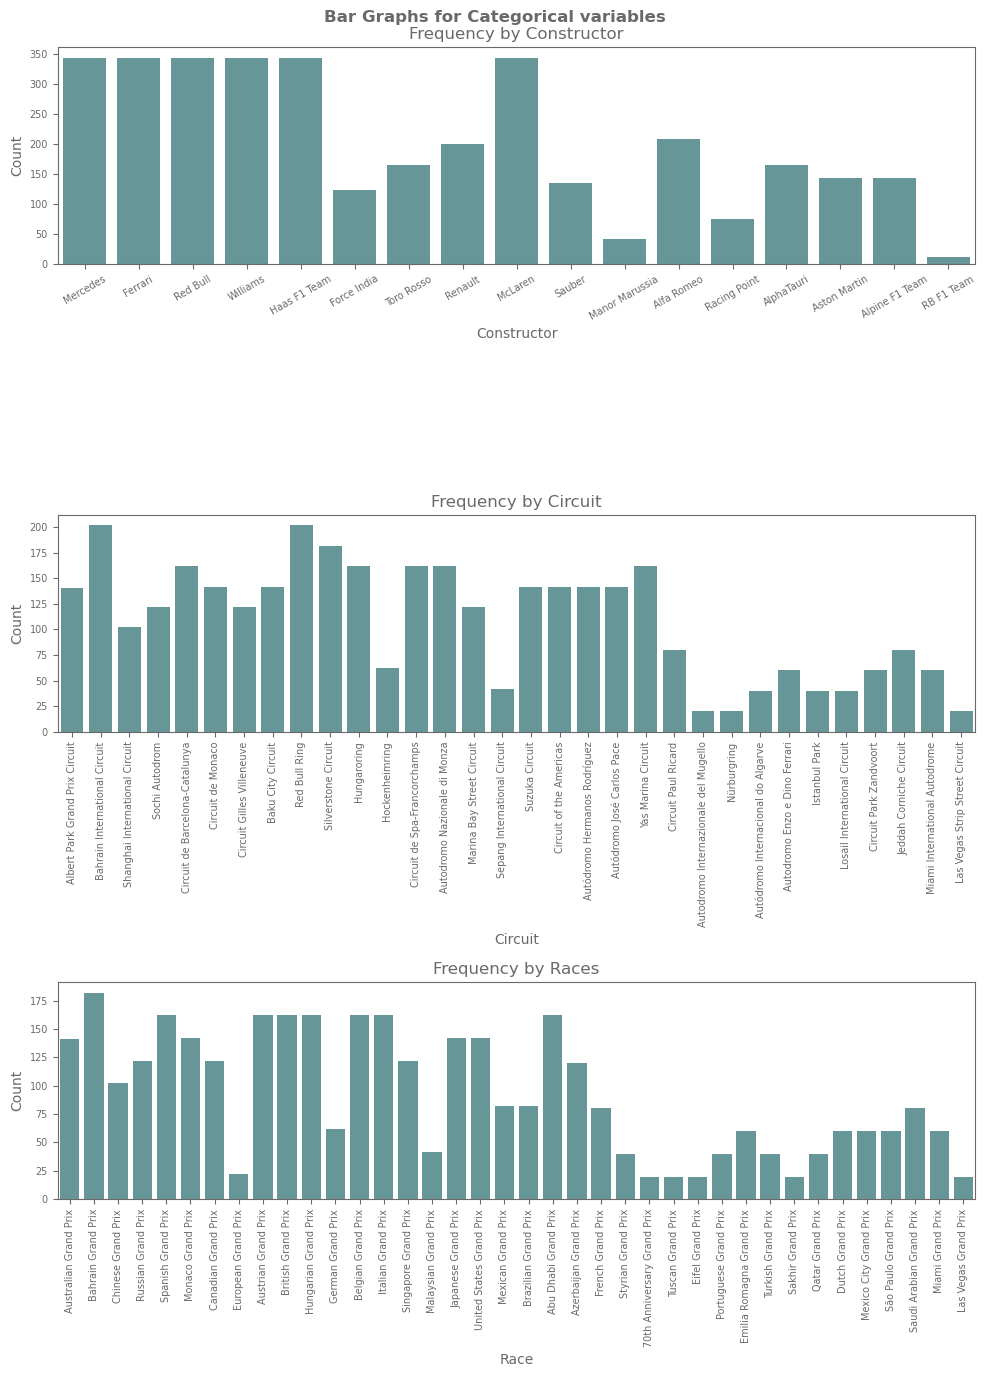

In [249]:
# Subplots for Bar Graphs of Categorical Variables
fig, axs = plt.subplots(3, 1, figsize=(10, 14))
fig.suptitle("Bar Graphs for Categorical variables", color = "dimgray", fontweight="bold")

sns.countplot(data= df, 
            x="constructor_name",
            color="cadetblue",
            ax=axs[0])
axs[0].tick_params(axis = 'x',labelrotation=30,labelsize=7,color = "dimgray")
axs[0].tick_params(axis = 'y',labelrotation=0,labelsize=7,color = "dimgray")
axs[0].set_xticklabels(axs[0].get_xticklabels(), color='dimgray')
axs[0].set_yticklabels(axs[0].get_yticklabels(), color='dimgray')
axs[0].set_title("Frequency by Constructor",color = "dimgray")
axs[0].set_xlabel("Constructor",color = "dimgray")
axs[0].set_ylabel("Count",color = "dimgray")
axs[0].spines['top'].set_color('dimgray')
axs[0].spines['right'].set_color('dimgray')
axs[0].spines['bottom'].set_color('dimgray')
axs[0].spines['left'].set_color('dimgray')


sns.countplot(data= df, 
            x="circuit_name",
            color="cadetblue",
            ax=axs[1])
axs[1].tick_params(axis = 'x',labelrotation=90, labelsize=7,color = "dimgray")
axs[1].tick_params(axis = 'y',labelrotation=0,labelsize=7,color = "dimgray")
axs[1].set_xticklabels(axs[1].get_xticklabels(), color='dimgray')
axs[1].set_yticklabels(axs[1].get_yticklabels(), color='dimgray')
axs[1].set_title("Frequency by Circuit",color = "dimgray")
axs[1].set_xlabel("Circuit",color = "dimgray")
axs[1].set_ylabel("Count",color = "dimgray")
axs[1].spines['top'].set_color('dimgray')
axs[1].spines['right'].set_color('dimgray')
axs[1].spines['bottom'].set_color('dimgray')
axs[1].spines['left'].set_color('dimgray')

sns.countplot(data= df, 
            x="race_name",
            color="cadetblue",
            ax=axs[2])
axs[2].tick_params( axis = 'x', labelrotation=90, labelsize=7,color = "dimgray")
axs[2].tick_params(axis = 'y',labelrotation=0,labelsize=7,color = "dimgray")
axs[2].set_xticklabels(axs[2].get_xticklabels(), color='dimgray')
axs[2].set_yticklabels(axs[2].get_yticklabels(), color='dimgray')
axs[2].set_title("Frequency by Races",color = "dimgray")
axs[2].set_xlabel("Race",color = "dimgray")
axs[2].set_ylabel("Count",color = "dimgray")
axs[2].spines['top'].set_color('dimgray')
axs[2].spines['right'].set_color('dimgray')
axs[2].spines['bottom'].set_color('dimgray')
axs[2].spines['left'].set_color('dimgray')


plt.tight_layout()
plt.show()

In [149]:
total_points = qualy_finished.groupby('constructor_name')['race_points'].sum()
total_points

constructor_name
Alfa Romeo         147.0
AlphaTauri         306.0
Alpine F1 Team     436.0
Aston Martin       440.0
Ferrari           3497.5
Force India        471.0
Haas F1 Team       247.0
Manor Marussia       1.0
McLaren           1321.0
Mercedes          4929.5
RB F1 Team          13.0
Racing Point       283.0
Red Bull          4294.5
Renault            459.0
Sauber              55.0
Toro Rosso         234.0
Williams           286.0
Name: race_points, dtype: float64

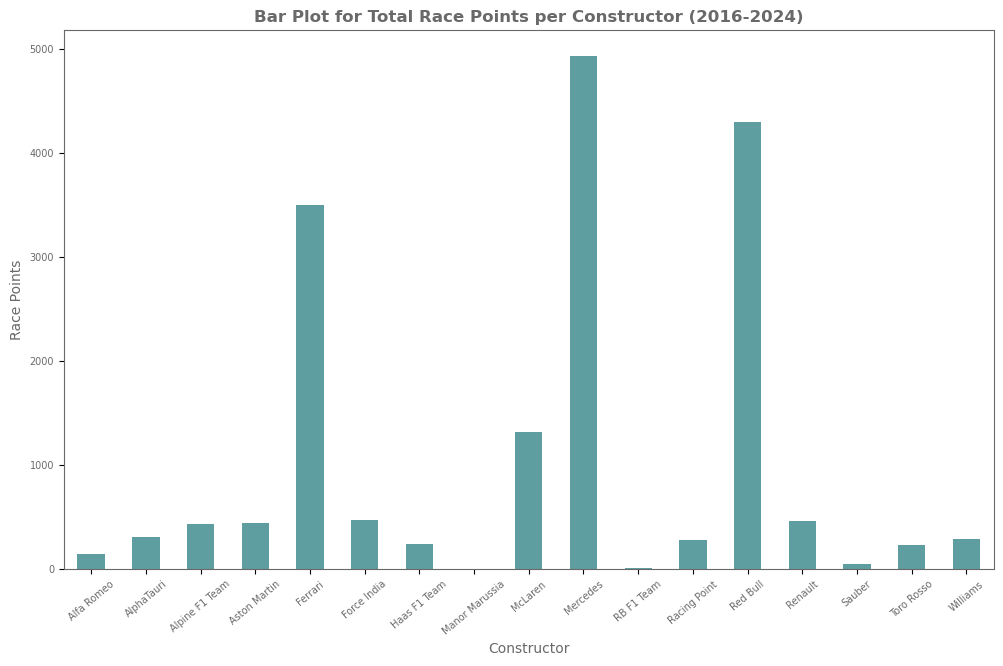

In [250]:
# Bar plot for total race points per constructor
race_con_2 = df.groupby('constructor_name')['race_points'].sum().plot(kind="bar", color = "cadetblue", figsize = (12,7))
plt.title('Bar Plot for Total Race Points per Constructor (2016-2024)',fontweight="bold",color="dimgray")
plt.xlabel('Constructor', color='dimgray')
plt.ylabel('Race Points', color='dimgray')
plt.xticks(rotation=40,color='dimgray', fontsize=7)
plt.yticks(color='dimgray', fontsize=7)
race_con_2.xaxis.label.set_color('dimgray')
race_con_2.yaxis.label.set_color('dimgray')
race_con_2.spines['top'].set_color('dimgray')
race_con_2.spines['right'].set_color('dimgray')
race_con_2.spines['bottom'].set_color('dimgray')
race_con_2.spines['left'].set_color('dimgray')

plt.show()

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   raceId                3481 non-null   int64         
 1   year                  3481 non-null   int64         
 2   circuitId             3481 non-null   int64         
 3   race_name             3481 non-null   object        
 4   driverId              3481 non-null   float64       
 5   constructorId         3481 non-null   float64       
 6   race_points           3481 non-null   float64       
 7   race_fastestLapTime   3481 non-null   datetime64[ns]
 8   race_fastestLapSpeed  3481 non-null   float64       
 9   dob                   3481 non-null   datetime64[ns]
 10  qualifyId             3471 non-null   float64       
 11  circuit_name          3481 non-null   object        
 12  circuit_altitude      3481 non-null   int64         
 13  constructor_points

In [ ]:
def describe_helper(series):
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

Counts and Distribution for q1_complete:


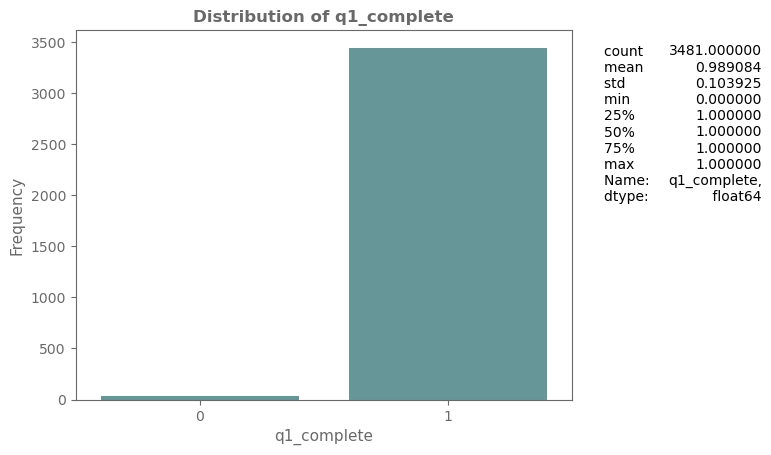

Counts and Distribution for q2_complete:


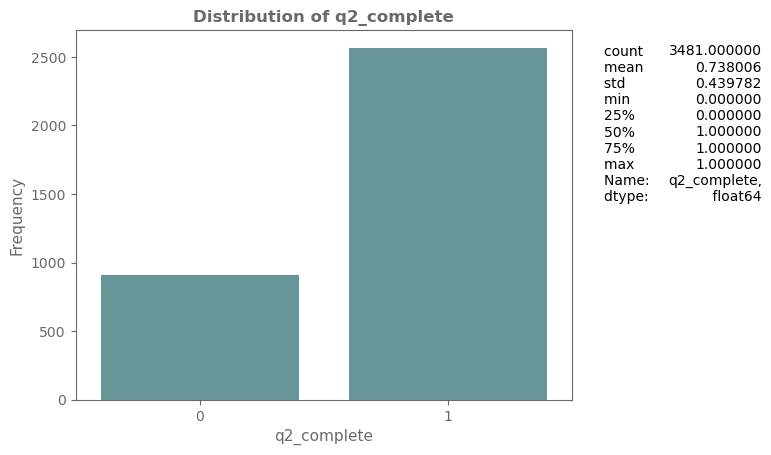

Counts and Distribution for q3_complete:


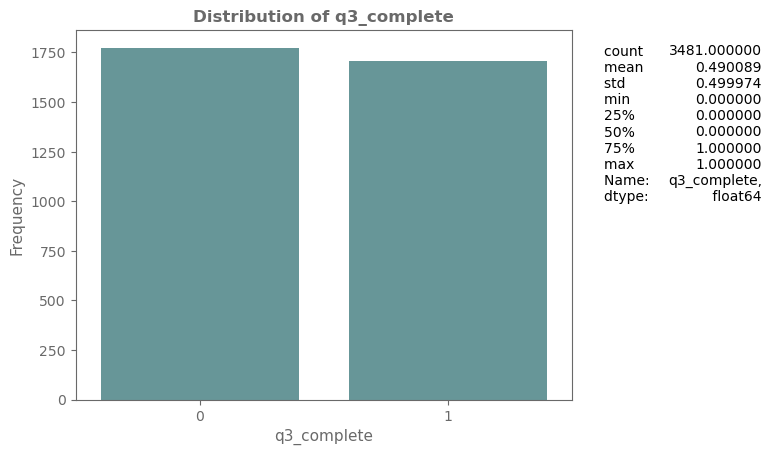

In [246]:
qualificaton_indicators = ['q1_complete','q2_complete','q3_complete']

x = df[qualificaton_indicators]

for column in df[qualificaton_indicators]:
    print(f'Counts and Distribution for {column}:')
    qualy = sns.countplot(data= df, x=column,color="cadetblue")
    qualy.set_xlabel( column , size = 11, color="dimgray" )
    qualy.set_ylabel( "Frequency" , size = 11, color="dimgray" ) 
    qualy.set_title(f'Distribution of {column}' , 
               fontsize = 'large' ,  
               fontweight = 'bold',
               color="dimgray") 
    qualy.spines['top'].set_color('dimgray')
    qualy.spines['right'].set_color('dimgray')
    qualy.spines['bottom'].set_color('dimgray')
    qualy.spines['left'].set_color('dimgray')
    qualy.tick_params(axis='x', colors='dimgray')
    qualy.tick_params(axis='y', colors='dimgray')
    plt.figtext(.95, .49, describe_helper(pd.Series(df[column]))[0], {'multialignment':'left'})
    plt.figtext(1.05, .49, describe_helper(pd.Series(df[column]))[1], {'multialignment':'right'})
    plt.show()